In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
data.head(3)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0


In [4]:
data.shape

(19219, 35)

In [5]:
data.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

These are the descriptions for the daatset:


1. `id`: Unique identifier for each observation in the dataset.
2. `X_Minimum`: Minimum x-coordinate of the defect bounding box.
3. `X_Maximum`: Maximum x-coordinate of the defect bounding box.
4. `Y_Minimum`: Minimum y-coordinate of the defect bounding box.
5. `Y_Maximum`: Maximum y-coordinate of the defect bounding box.
6. `Pixels_Areas`: Area of the defect in terms of pixels.
7. `X_Perimeter`: Perimeter of the defect along the x-axis.
8. `Y_Perimeter`: Perimeter of the defect along the y-axis.
9. `Sum_of_Luminosity`: Sum of luminosity values within the defect area.
10. `Minimum_of_Luminosity`: Minimum luminosity value within the defect area.
11. `Maximum_of_Luminosity`: Maximum luminosity value within the defect area.
12. `Length_of_Conveyer`: Length of the conveyer belt at the time of inspection.
13. `TypeOfSteel_A300`: Indicator for whether the steel type is A300.
14. `TypeOfSteel_A400`: Indicator for whether the steel type is A400.
15. `Steel_Plate_Thickness`: Thickness of the steel plate.
16. `Edges_Index`: Index representing the ratio of the length of the perimeter to the bounding box perimeter.
17. `Empty_Index`: Index representing the ratio of empty pixels to the total pixels in the defect area.
18. `Square_Index`: Index representing the ratio of the area of the defect to the area of the bounding box.
19. `Outside_X_Index`: Index representing the ratio of the number of exterior horizontal edges to the total number of edges.
20. `Edges_X_Index`: Index representing the ratio of horizontal edges to the total number of edges.
21. `Edges_Y_Index`: Index representing the ratio of vertical edges to the total number of edges.
22. `Outside_Global_Index`: Index representing the ratio of exterior edges to the total number of edges.
23. `LogOfAreas`: Logarithm of the area of the defect.
24. `Log_X_Index`: Logarithm of the horizontal position index.
25. `Log_Y_Index`: Logarithm of the vertical position index.
26. `Orientation_Index`: Index representing the orientation of the defect.
27. `Luminosity_Index`: Index representing the luminosity of the defect.
28. `SigmoidOfAreas`: Sigmoid transformation of the area of the defect.
29. `Pastry`, `Z_Scratch`, `K_Scatch`, `Stains`, `Dirtiness`, `Bumps`, `Other_Faults`: Binary indicators representing different types of defects, where each column indicates the presence or absence of a specific defect type.

In [6]:
data.dtypes

id                         int64
X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch  

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


# simple model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]
X = data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)

MinMaxScaler()

In [12]:
X = min_max_scaler.transform(X)

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=37)
X_train = X
y_train = y

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2024-03-14 13:44:19.157387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
adam = Adam(learning_rate=3e-6)
earlyStopping = EarlyStopping(monitor='val_loss',
                             patience=10,
                             restore_best_weights=True,
                             start_from_epoch=100)

In [16]:
basic_model = Sequential()
basic_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
basic_model.add(Dense(1024, activation='relu'))
basic_model.add(Dropout(0.3))
basic_model.add(Dense(256, activation='relu'))
basic_model.add(Dense(64, activation='relu'))
basic_model.add(Dense(16, activation='relu'))
basic_model.add(Dense(7, activation='softmax'))

In [17]:
basic_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

In [18]:
basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               14336     
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 7)                 1

In [19]:
history = basic_model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, callbacks=[earlyStopping])

Epoch 1/300
961/961 [==============================] - 7s 6ms/step - loss: 1.7101 - acc: 0.3335 - val_loss: 1.5792 - val_acc: 0.3218
Epoch 2/300
961/961 [==============================] - 6s 6ms/step - loss: 1.5194 - acc: 0.3241 - val_loss: 1.4881 - val_acc: 0.3166
Epoch 3/300
961/961 [==============================] - 6s 6ms/step - loss: 1.4494 - acc: 0.3341 - val_loss: 1.4353 - val_acc: 0.4209
Epoch 4/300
961/961 [==============================] - 6s 6ms/step - loss: 1.4021 - acc: 0.4542 - val_loss: 1.3978 - val_acc: 0.4685
Epoch 5/300
961/961 [==============================] - 6s 6ms/step - loss: 1.3667 - acc: 0.4716 - val_loss: 1.3642 - val_acc: 0.4688
Epoch 6/300
961/961 [==============================] - 6s 6ms/step - loss: 1.3355 - acc: 0.4811 - val_loss: 1.3331 - val_acc: 0.4735
Epoch 7/300
961/961 [==============================] - 6s 7ms/step - loss: 1.3059 - acc: 0.4920 - val_loss: 1.3058 - val_acc: 0.4854
Epoch 8/300
961/961 [==============================] - 7s 7ms/step - 

961/961 [==============================] - 6s 6ms/step - loss: 0.9863 - acc: 0.5446 - val_loss: 0.9968 - val_acc: 0.5333
Epoch 63/300
961/961 [==============================] - 6s 6ms/step - loss: 0.9863 - acc: 0.5445 - val_loss: 0.9954 - val_acc: 0.5328
Epoch 64/300
961/961 [==============================] - 6s 6ms/step - loss: 0.9851 - acc: 0.5439 - val_loss: 0.9946 - val_acc: 0.5356
Epoch 65/300
961/961 [==============================] - 6s 7ms/step - loss: 0.9818 - acc: 0.5489 - val_loss: 0.9944 - val_acc: 0.5343
Epoch 66/300
961/961 [==============================] - 6s 6ms/step - loss: 0.9797 - acc: 0.5486 - val_loss: 0.9928 - val_acc: 0.5341
Epoch 67/300
961/961 [==============================] - 6s 6ms/step - loss: 0.9806 - acc: 0.5459 - val_loss: 0.9934 - val_acc: 0.5320
Epoch 68/300
961/961 [==============================] - 6s 6ms/step - loss: 0.9789 - acc: 0.5467 - val_loss: 0.9920 - val_acc: 0.5349
Epoch 69/300
961/961 [==============================] - 6s 6ms/step - loss:

961/961 [==============================] - 7s 7ms/step - loss: 0.9698 - acc: 0.5436 - val_loss: 0.9741 - val_acc: 0.5403
Epoch 124/300
961/961 [==============================] - 6s 7ms/step - loss: 0.9734 - acc: 0.5389 - val_loss: 0.9722 - val_acc: 0.5419
Epoch 125/300
961/961 [==============================] - 6s 7ms/step - loss: 0.9706 - acc: 0.5422 - val_loss: 0.9727 - val_acc: 0.5419
Epoch 126/300
961/961 [==============================] - 6s 7ms/step - loss: 0.9755 - acc: 0.5399 - val_loss: 0.9736 - val_acc: 0.5395
Epoch 127/300
961/961 [==============================] - 7s 7ms/step - loss: 0.9781 - acc: 0.5417 - val_loss: 0.9731 - val_acc: 0.5401


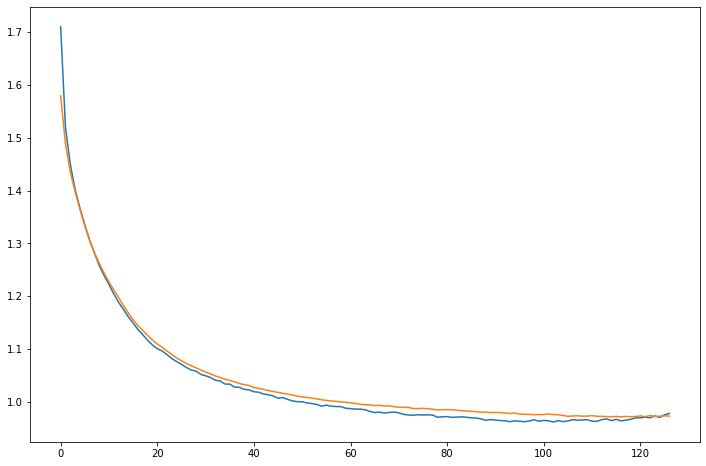

In [20]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
# sns.lineplot(history.history['loss'])
# sns.lineplot(history.history['val_loss']);

In [21]:
test_data = pd.read_csv("../data/test.csv")

In [22]:
test_data.shape

(12814, 28)

In [23]:
test_data

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844


In [24]:
min_max_scaler_test = MinMaxScaler()
min_max_scaler_test.fit(test_data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']])
X_test = min_max_scaler_test.transform(test_data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']])

In [25]:
prediction = basic_model.predict(X_test)

401/401 [==============================] - 1s 3ms/step


In [26]:
prediction[0]

array([2.9505327e-01, 2.6109589e-03, 3.2227035e-04, 2.8003365e-04,
       5.1030722e-02, 2.2630529e-01, 4.2439744e-01], dtype=float32)

In [27]:
submission_basic_model = pd.read_csv("../data/sample_submission.csv")
submission_basic_model = submission_basic_model[0:0]
submission_basic_model.id = test_data.id
submission_basic_model[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']] = prediction

In [28]:
submission_basic_model.head(3)

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.295053,0.002611,0.000322,0.000280,0.051031,0.226305,0.424397
1,19220,0.264589,0.055131,0.008290,0.003463,0.202597,0.131791,0.334140
2,19221,0.020305,0.066601,0.046567,0.009617,0.016791,0.338231,0.501887


In [29]:
submission_basic_model.to_csv("../data/submission_basic_model_depth_nn.csv", index=False)